#NETFLIX DATA ANALYSIS

#Introduction
This project analyzes the Netflix dataset to explore trends in content production, popular genres, top countries, and key contributors.  
The goal is to uncover insights on how Netflix’s library has evolved over the years using Python, Pandas, and Matplotlib.

Dataset: Netflix titles from Kaggle  

Key Analyses:
- Movies vs TV Shows count  
- Top content-producing countries  
- Popular genres  
- Content trends over the years  
- Frequent directors and cast members  
- Content duration patterns  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For cleaner plots
sns.set(style="whitegrid")


In [4]:
df = pd.read_csv("netflix_title.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()          # Check datatypes and nulls
df.isnull().sum()  # Confirm missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

1. Movies vs TV Shows Count
Comparison of the total number of movies and TV shows available on Netflix.


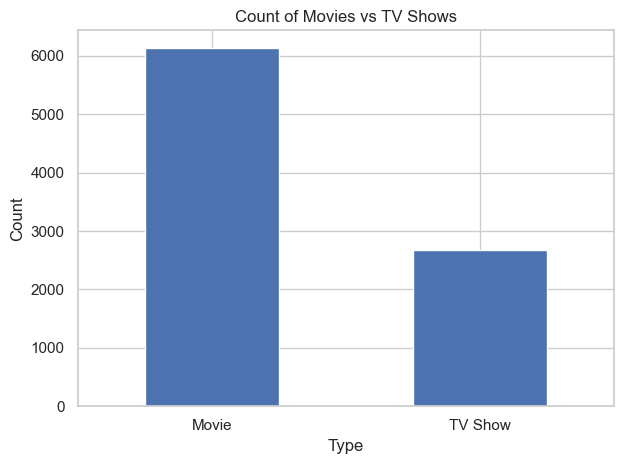

In [5]:
df['type'].value_counts().plot(kind='bar', title='Count of Movies vs TV Shows')
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=0,ha='center')
plt.tight_layout()
plt.show()


2. Top 10 Countries by Content
Countries producing the highest number of Netflix titles.


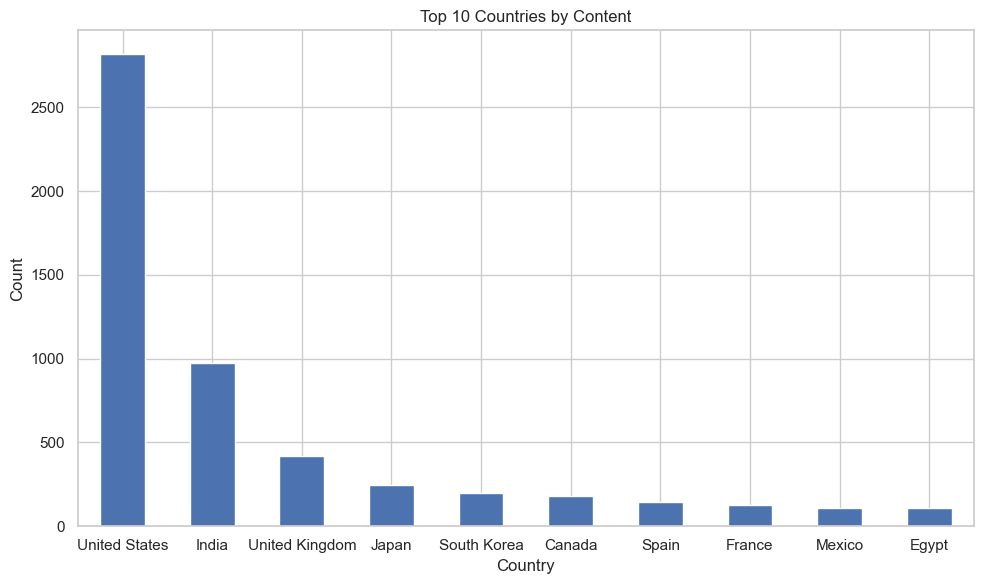

In [6]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', title='Top 10 Countries by Content')
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=0, ha='center')  # Horizontal labels
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


3. Top 10 Genres
Most frequently occurring genres in the Netflix library.


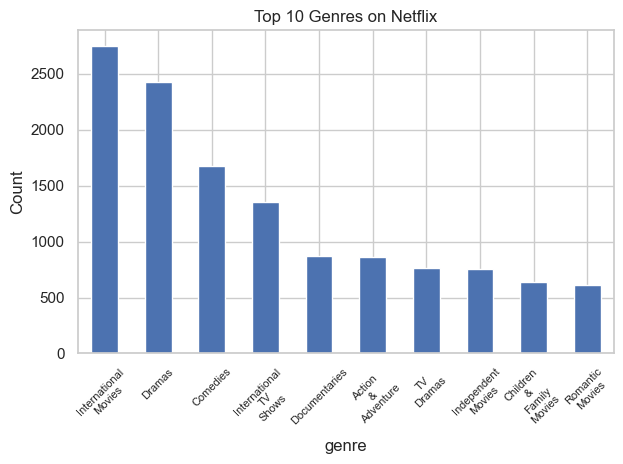

In [7]:
from collections import Counter

genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]
top_genres = pd.Series(Counter(flat_genres)).sort_values(ascending=False).head(10)


top_genres.plot(kind='bar', width=0.5 ,title='Top 10 Genres on Netflix')
plt.ylabel("Count")
plt.xlabel("genre")
labels = ['\n'.join(name.split()) for name in top_genres.index]
plt.xticks(range(len(top_genres)), labels , rotation=45,ha='center',fontsize=8)
plt.tight_layout()
plt.show()


4. Content Added Over the Years
Year-wise trend showing how Netflix’s content library has grown.


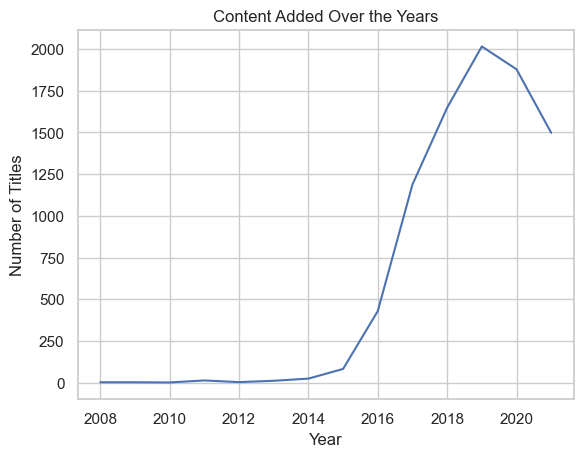

In [14]:
# Remove extra spaces and convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extract year after conversion
df['year_added'] = df['date_added'].dt.year

# Plot content added over the years
df['year_added'].value_counts().sort_index().plot(kind='line', title='Content Added Over the Years')
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()



5. Top 10 Directors
Directors with the most titles available on Netflix.


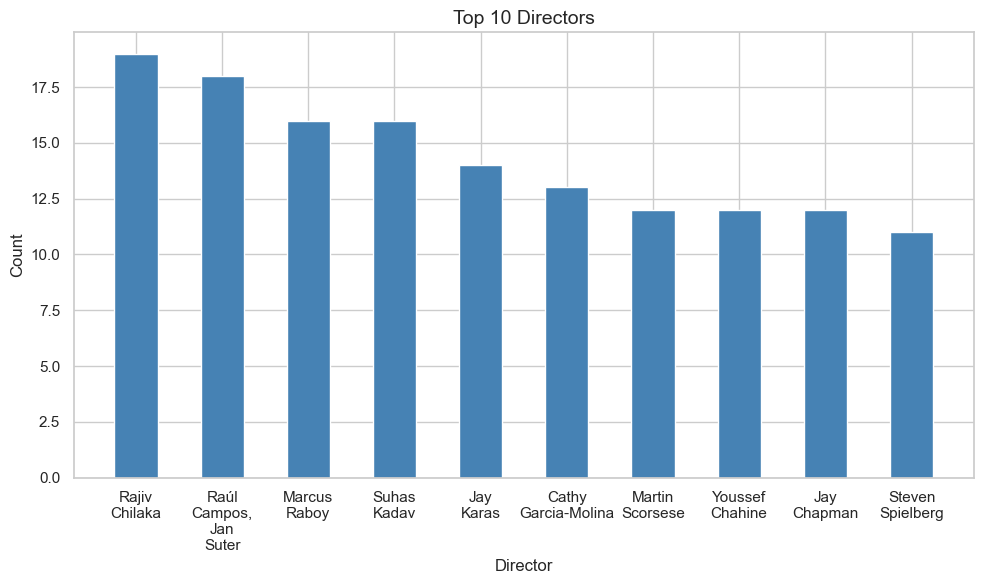

In [24]:


# Get top 10 directors
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_directors.index, top_directors.values, width=0.5, color='steelblue')  # Reduced width

plt.title("Top 10 Directors", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Director", fontsize=12)

# Wrap long names into multiple lines
labels = ['\n'.join(name.split()) for name in top_directors.index]
plt.xticks(range(len(top_directors)), labels, rotation=0, ha='center')

plt.tight_layout()
plt.show()


6. Top 10 Cast Members
Actors who appear most frequently in Netflix titles.


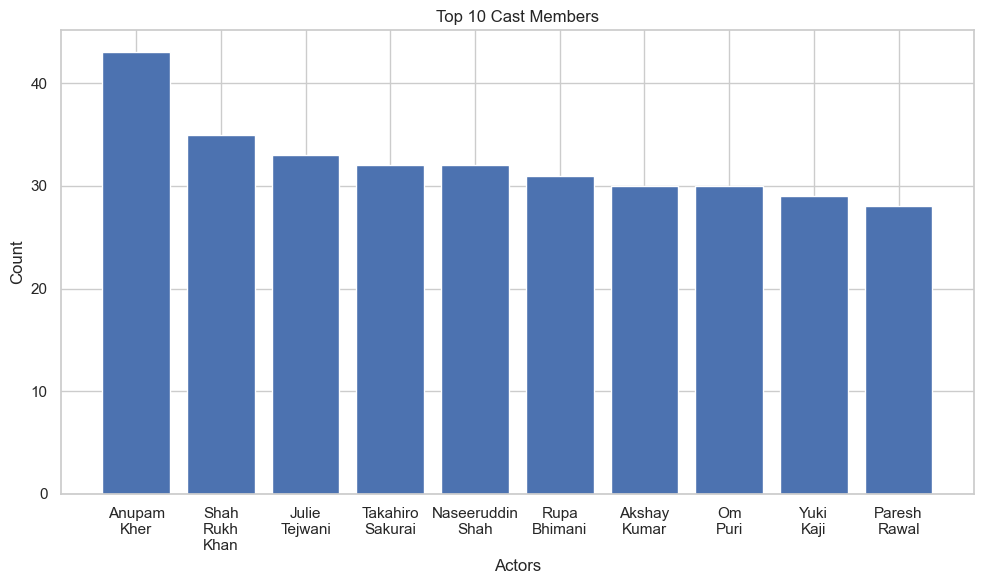

In [26]:
# Prepare top cast data
cast_data = df['cast'].dropna().str.split(', ')
flat_cast = [actor for sublist in cast_data for actor in sublist]
top_cast = pd.Series(Counter(flat_cast)).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.bar(range(len(top_cast)), top_cast.values)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Actors", fontsize=12)

# Format x-axis labels: split into multiple lines if long
labels = ['\n'.join(name.split()) for name in top_cast.index]
plt.xticks(range(len(top_cast)), labels, rotation=0, ha='center')

plt.title('Top 10 Cast Members')
plt.tight_layout()
plt.show()


7. Movies vs TV Shows Over the Years
Distribution of movies and TV shows released each year.


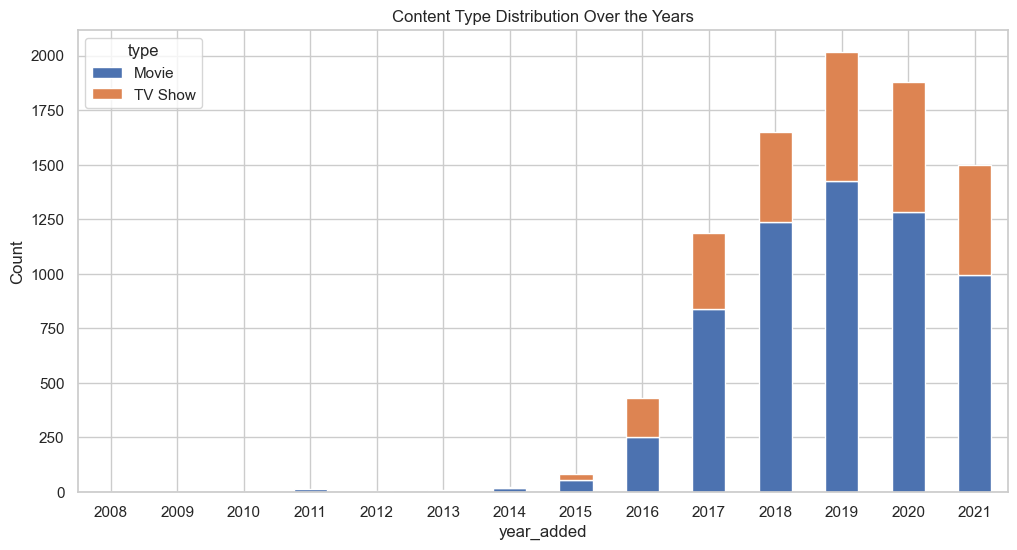

In [28]:
# Convert year_added to integer
df['year_added'] = df['year_added'].astype('Int64')  # keeps NaN if present

df.groupby(['year_added', 'type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6), title='Content Type Distribution Over the Years')
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
8. Most Common Durations
Most frequently occurring movie lengths and TV show seasons.


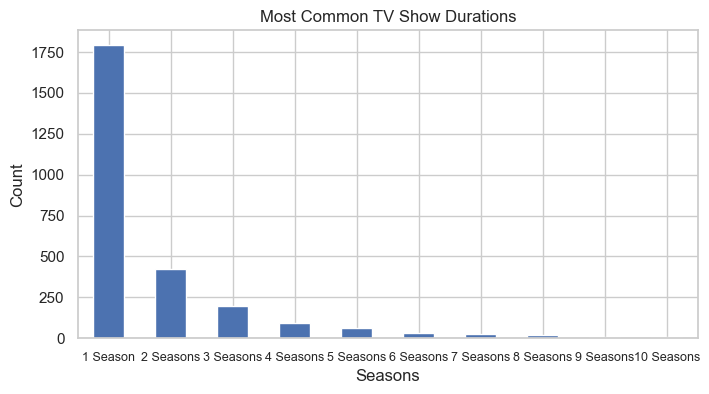

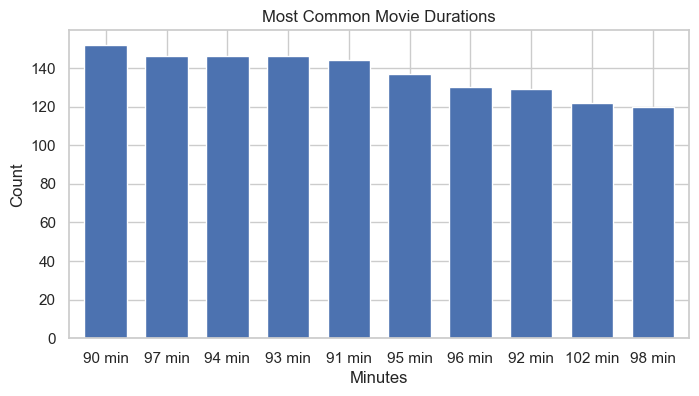

In [43]:
# TV Shows: filter rows containing 'Season'
tv_durations = df[df['duration'].str.contains('Season', na=False)]['duration'].value_counts().head(10)

# Movies: filter rows containing 'min'
movie_durations = df[df['duration'].str.contains('min', na=False)]['duration'].value_counts().head(10)

# Plot TV durations
plt.figure(figsize=(8,4))
tv_durations.plot(kind='bar', title='Most Common TV Show Durations')
plt.ylabel("Count")
plt.xlabel("Seasons")
plt.xticks(rotation=0,fontsize=9)
plt.show()

# Plot Movie durations
plt.figure(figsize=(8,4))
movie_durations.plot(kind='bar', width=0.7, title='Most Common Movie Durations')
plt.ylabel("Count",fontsize=12)
plt.xlabel("Minutes",fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [46]:
import os
os.getcwd()



'C:\\Users\\GOPIKA\\anaconda_projects\\cd716975-76cb-466c-8187-0d23f7cf9e43'